## Discrete Knapsack problem
#### (Dyskretny problem plecakowy)
0-1 - either the item is taken or not

In [1]:
import pandas as pd

inf = 10000000
s = [5, 2, 4, 8, 2, 7, 8]  # items size
w = [9, 3, 3, 7, 9, 9, 9]  # items worth
b = 11  # knapsack size
UB = sum(w)
g = [[0 for _ in range(UB+1)] for _ in range(len(w)+1)]
for i in range(len(g)): g[i][0] = 0
for j in range(1,UB+1): g[0][j] = inf

for i in range(1,len(g)): 
    for j in range(1,UB+1):
        if w[i-1] <= j:
            g[i][j] = min(g[i-1][j-w[i-1]] + s[i-1], g[i-1][j])
        else:
            g[i][j] = g[i-1][j]
        
for i in range(len(g)): 
    for j in range(UB+1):
        if g[i][j] == inf: g[i][j] = " "
       
take = 0
for j in range(UB, 0, -1):
    try:
        if g[len(g)-1][j] <= b:
            print("With knapsack size {}, the biggest worth is {}".format(b,j))
            take = j; break
    except: continue

j = take
i = len(g)-1
res = []
curr_el = g[i][j]

while j != 0:
    if curr_el == g[i-1][j]:  # element not chosen
        curr_el = g[i-1][j]
        i-=1
    else:
        res.append(i)
        curr_el = g[i-1][j-w[i-1]]
        i-=1; j-=w[i]
            
print("Numbers of chosen elements: ", *res)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df = pd.DataFrame(g)
df.columns = [_ for _ in range(UB+1)]
df.iloc[:len(g)]

With knapsack size 11, the biggest worth is 21
Numbers of chosen elements:  5 2 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,,,,,,,,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0,,,2,,,,,,5,,,7,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,0,,,2,,,6,,,5,,,7,,,11,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,0,,,2,,,6,8,,5,10,,7,14,,11,13,,,15,,,19,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,0,,,2,,,6,8,,2,10,,4,14,,8,10,,7,12,,9,16,,13,15,,,17,,,21,,,,,,,,,,,,,,,,,,
6,0,,,2,,,6,8,,2,10,,4,14,,8,10,,7,12,,9,16,,13,15,,14,17,,16,21,,20,22,,,24,,,28,,,,,,,,,
7,0,,,2,,,6,8,,2,10,,4,14,,8,10,,7,12,,9,16,,13,15,,14,17,,16,21,,20,22,,22,24,,24,28,,28,30,,,32,,,36


## Continuous Knapsack problem
#### (Ciągły problem plecakowy)
It's possible to take fraction of an item (from 0 up to its weight)

In [2]:
# knapsack size
b = 13
 
w = [5, 5, 10, 5, 9, 1, 2, 5, 2]  # values
s = [5, 6, 7, 10, 10, 4, 9, 7, 5]  # sizes
items = [[s[i], w[i]] for i in range(len(w))]

# or use this:
# size,value
# items = [
#     [9, 10],
#     [1, 7],
#     [7, 10],
#     [9, 1],
#     [2, 8],
#     [3, 8],
#     [7, 8],
#     [1, 3],
#     [7, 7]
# ]
 
####################################################
 
for i in range(len(items)):
    items[i].append(i+1)
 
items = sorted(items, key = lambda item: item[1]/item[0], reverse=True)
 
print("Reordered items: ")
for item in items:
    print("ID: {}, SIZE: {}, VALUE: {}, Wi/Si: {}".format(item[2], item[0], item[1], item[1]/item[0]))
 
knapsack = []
i = 0
while b - items[i][0] >= 0:
    b -= items[i][0]
    knapsack.append(items[i])
    i += 1
 
if b != 0:
    items[i][1] = items[i][1] * b / items[i][0]
    items[i][0] = b
    knapsack.append(items[i])
 
print("\nKnapsack value: {}".format(sum(x[1] for x in knapsack)))
print("Items in knapsack: ")
for item in knapsack:
    print("ID: {}, SIZE: {}, VALUE: {}, FULL_VALUE: {}, FULL_SIZE: {}, RATIO_IN_SACK: {}%".format(item[2], item[0], item[1], w[item[2]-1], s[item[2]-1], round(item[0]/s[item[2]-1] * 100, 2)))


Reordered items: 
ID: 3, SIZE: 7, VALUE: 10, Wi/Si: 1.4285714285714286
ID: 1, SIZE: 5, VALUE: 5, Wi/Si: 1.0
ID: 5, SIZE: 10, VALUE: 9, Wi/Si: 0.9
ID: 2, SIZE: 6, VALUE: 5, Wi/Si: 0.8333333333333334
ID: 8, SIZE: 7, VALUE: 5, Wi/Si: 0.7142857142857143
ID: 4, SIZE: 10, VALUE: 5, Wi/Si: 0.5
ID: 9, SIZE: 5, VALUE: 2, Wi/Si: 0.4
ID: 6, SIZE: 4, VALUE: 1, Wi/Si: 0.25
ID: 7, SIZE: 9, VALUE: 2, Wi/Si: 0.2222222222222222

Knapsack value: 15.9
Items in knapsack: 
ID: 3, SIZE: 7, VALUE: 10, FULL_VALUE: 10, FULL_SIZE: 7, RATIO_IN_SACK: 100.0%
ID: 1, SIZE: 5, VALUE: 5, FULL_VALUE: 5, FULL_SIZE: 5, RATIO_IN_SACK: 100.0%
ID: 5, SIZE: 1, VALUE: 0.9, FULL_VALUE: 9, FULL_SIZE: 10, RATIO_IN_SACK: 10.0%


## Floyd Warshall algorithm - find the shortest path in directed weighted graph
#### (Najmniejsze odległości między parami wierzchołków)

In [3]:
import pandas as pd
# Python Program for Floyd Warshall Algorithm
inf = 99999

# Number of vertices in the graph
V = 5

graph = [
    [0, 4, inf, inf, inf],
    [inf, 0, 4, 2, inf],
    [inf, inf, 0, 4, inf],
    [inf, inf, inf, 0, 4],
    [1, 1, 1, inf, 0]
]


dist = list(map(lambda i: list(map(lambda j: j, i)), graph))
for k in range(V):
    # pick all vertices as source one by one
    for i in range(V):
        # Pick all vertices as destination for the source picked above
        for j in range(V):
            # If vertex k is on the shortest path from i to j, then update the value of dist[i][j]
            dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
    print("Iteration", k+1)
    display(pd.DataFrame([['' if element==inf else element for element in a]  for a in dist]))

Iteration 1


,0,1,2,3,4
0,0,4,,,
1,,0,4,2,
2,,,0,4,
3,,,,0,4
4,1,1,1,,0


Iteration 2


,0,1,2,3,4
0,0,4,8,6,
1,,0,4,2,
2,,,0,4,
3,,,,0,4
4,1,1,1,3,0


Iteration 3


,0,1,2,3,4
0,0,4,8,6,
1,,0,4,2,
2,,,0,4,
3,,,,0,4
4,1,1,1,3,0


Iteration 4


,0,1,2,3,4
0,0,4,8,6,10
1,,0,4,2,6
2,,,0,4,8
3,,,,0,4
4,1,1,1,3,0


Iteration 5


,0,1,2,3,4
0,0,4,8,6,10
1,7,0,4,2,6
2,9,9,0,4,8
3,5,5,5,0,4
4,1,1,1,3,0


## Most reliable connection
#### (Najbardziej niezawodne połączenie)

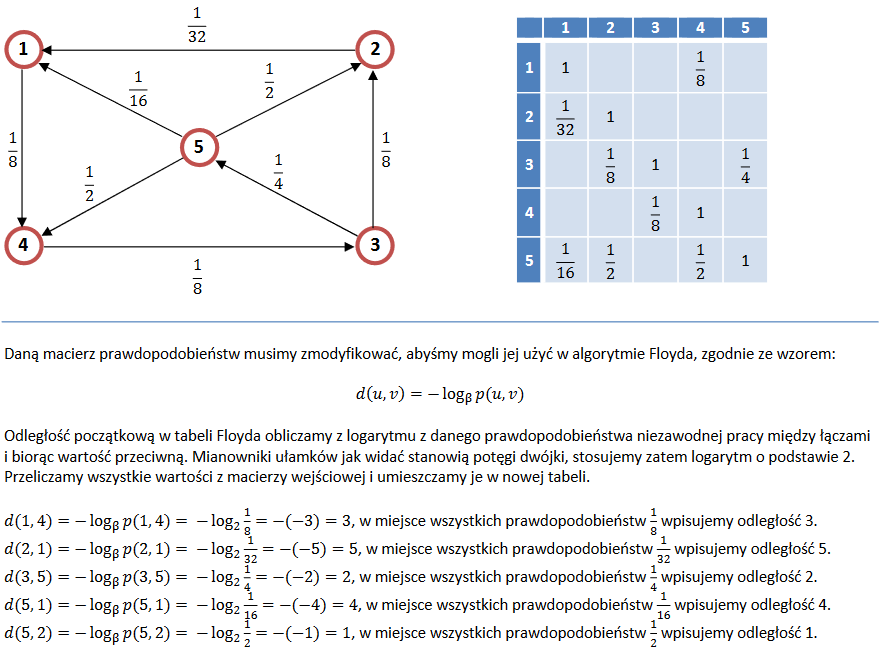

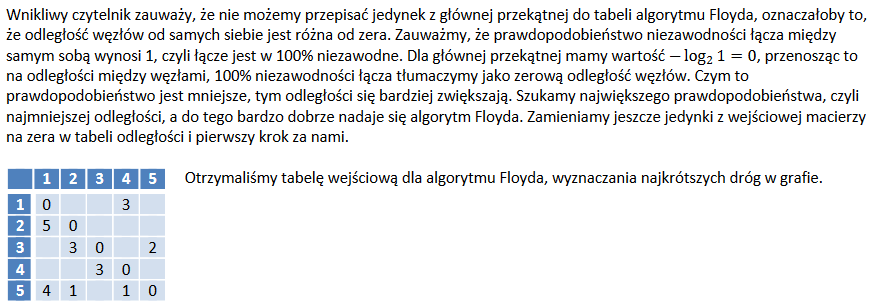

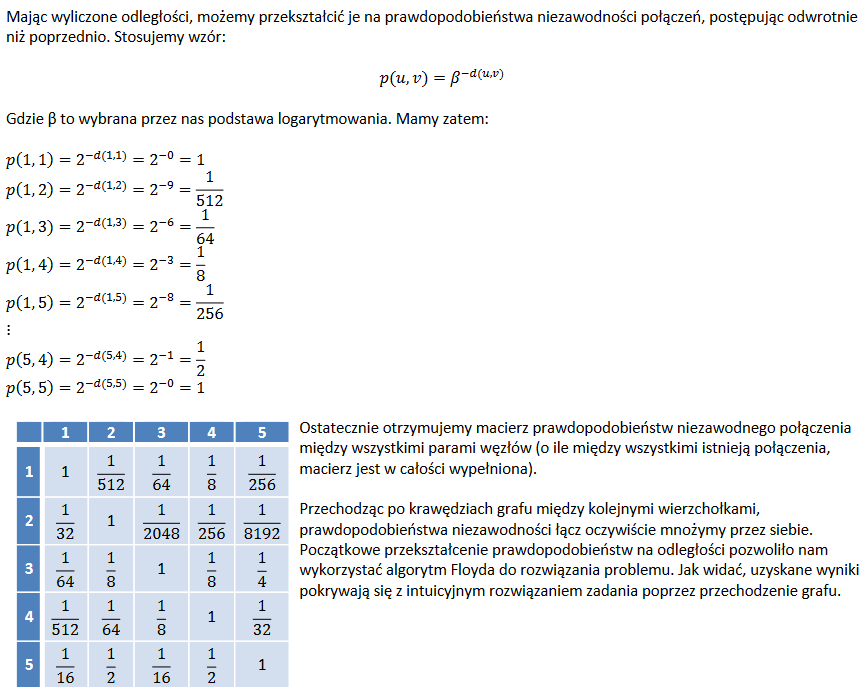

## Minimal cost flow
#### (Przepływ o minimalnym koszcie)

In [4]:
inf = 99999
v_nr = 5  # vertices number

# list of edges
# (from, to) : [cost, capacity, flow]
# (nr_od, nr_do, koszt, pojemność, przepływ)
ls = {(1,2):[1,3,1],
      (1,4):[4,2,0],
      (2,4):[2,1,1],
      (2,3):[8,4,0],
      (4,3):[3,2,0],
      (3,5):[6,3,0],
      (4,5):[1,5,1]
     }

dist = [[inf if i != j else 0 for i in range(v_nr)] for j in range(v_nr)]
for i in range(v_nr):
    for j in range(v_nr):
        if (i+1,j+1) in ls:
            price, volume, flow = ls[(i+1,j+1)]
            if volume-flow != 0 and price<dist[i][j]:
                dist[i][j] = price
            if flow != 0 and price<dist[j][i]:
                dist[j][i] = -price
print("After reading from the graph")
display(pd.DataFrame([['' if element==inf else element for element in a]  for a in dist]))

V = v_nr
for k in range(V):
    # pick all vertices as source one by one
    for i in range(V):
        # Pick all vertices as destination for source picked above
        for j in range(V):
            # If vertex k is on the shortest path from i to j, then update the value of dist[i][j]
            dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
    print("Iteration", k+1)
    display(pd.DataFrame([['' if float(element)>1000 else element for element in a]  for a in dist]))

After reading from the graph


,0,1,2,3,4
0,0,1,,4,
1,-1,0,8,,
2,,,0,,6
3,,-2,3,0,1
4,,,,-1,0


Iteration 1


,0,1,2,3,4
0,0,1,,4,
1,-1,0,8,3,
2,,,0,,6
3,,-2,3,0,1
4,,,,-1,0


Iteration 2


,0,1,2,3,4
0,0,1,9,4,
1,-1,0,8,3,
2,,,0,,6
3,-3,-2,3,0,1
4,,,,-1,0


Iteration 3


,0,1,2,3,4
0,0,1,9,4,15
1,-1,0,8,3,14
2,,,0,,6
3,-3,-2,3,0,1
4,,,,-1,0


Iteration 4


,0,1,2,3,4
0,0,1,7,4,5
1,-1,0,6,3,4
2,,,0,,6
3,-3,-2,3,0,1
4,-4,-3,2,-1,0


Iteration 5


,0,1,2,3,4
0,0,1,7,4,5
1,-1,0,6,3,4
2,2,3,0,5,6
3,-3,-2,3,0,1
4,-4,-3,2,-1,0


## Max flow
#### (Maksymalny przepływ)
DISCLAIMER - only gives the value

In [5]:
INF = float("inf")
class Dinic:
    def __init__(self, n):
        self.lvl = [0] * n
        self.ptr = [0] * n
        self.q = [0] * n
        self.adj = [[] for _ in range(n)]

    def add_edge(self, a, b, c, rcap=0):
        self.adj[a].append([b, len(self.adj[b]), c, 0])
        self.adj[b].append([a, len(self.adj[a]) - 1, rcap, 0])

    def depth_first_search(self, vertex, sink, flow):
        if vertex == sink or not flow:
            return flow
        for i in range(self.ptr[vertex], len(self.adj[vertex])):
            e = self.adj[vertex][i]
            if self.lvl[e[0]] == self.lvl[vertex] + 1:
                p = self.depth_first_search(e[0], sink, min(flow, e[2] - e[3]))
                if p:
                    self.adj[vertex][i][3] += p
                    self.adj[e[0]][e[1]][3] -= p
                    return p
            self.ptr[vertex] = self.ptr[vertex] + 1
        return 0

    # Calculate flow that reaches the sink
    def max_flow(self, source, sink):
        flow, self.q[0] = 0, source
        for l in range(31):  # noqa: E741  l = 30 maybe faster for random data
            while True:
                self.lvl, self.ptr = [0] * len(self.q), [0] * len(self.q)
                qi, qe, self.lvl[source] = 0, 1, 1
                while qi < qe and not self.lvl[sink]:
                    v = self.q[qi]
                    qi += 1
                    for e in self.adj[v]:
                        if not self.lvl[e[0]] and (e[2] - e[3]) >> (30 - l):
                            self.q[qe] = e[0]
                            qe += 1
                            self.lvl[e[0]] = self.lvl[v] + 1
                p = self.depth_first_search(source, sink, INF)
                while p:
                    flow += p
                    p = self.depth_first_search(source, sink, INF)
                if not self.lvl[sink]:
                    break
        return flow

# ***** *** Example of use
graph = Dinic(7)  # give no. of vertices (including source s and sink t)
source = 0  # s, (best if 0)
sink = 6  # t, (best if no. of vertices including s and t - 1)
# (vertex closer to s, vertex closer to t, max flow of edge)
# (v_bliżej_s, v_bliżej_t, max_przepływ)
edges = [(0,1,5),(0,2,2),(0,3,2),(0,4,9),(0,5,3),
         (1,2,1),(2,3,1),(3,4,2),(4,5,3),
         (1,6,3),(2,6,8),(3,6,4),(4,6,3),(5,6,7)]

for a, b, v in edges:
    graph.add_edge(a,b,v)

# Now we know the max flow(source -> sink)
print(f'max flow(source -> sink) = {graph.max_flow(source, sink)}')

max flow(source -> sink) = 17
